In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
np.random.seed(311)
t = np.arange(1, 41)
sales = 50 + 2 * t + np.random.normal(0, 10, 40)
index = pd.period_range(start="2015Q1", periods=40, freq="Q")
df = pd.DataFrame({'sales': sales}, index=index)
df["t"]=t

In [3]:
print(df.head())

            sales  t
2015Q1  30.029683  1
2015Q2  37.490060  2
2015Q3  53.465210  3
2015Q4  75.059960  4
2016Q1  64.474006  5


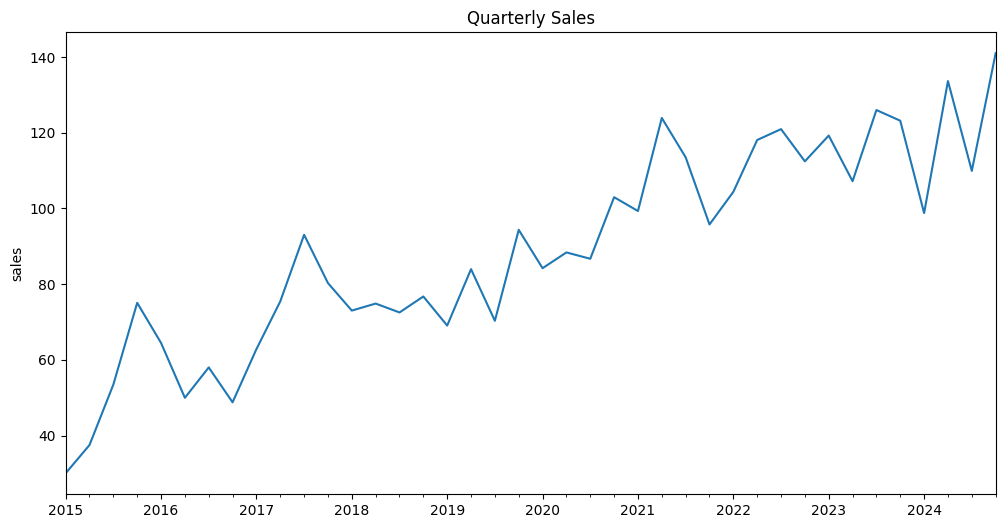

In [4]:
plt.figure(figsize=(12, 6))
df["sales"].plot(title="Quarterly Sales")
plt.ylabel("sales")
plt.show()

In [5]:
import statsmodels.api as sm
y = df["sales"]
x = sm.add_constant(df['t'])
model = sm.OLS(y, x).fit()


In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     188.4
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           2.63e-16
Time:                        18:36:29   Log-Likelihood:                -152.64
No. Observations:                  40   AIC:                             309.3
Df Residuals:                      38   BIC:                             312.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3682      3.634     12.486      0.0

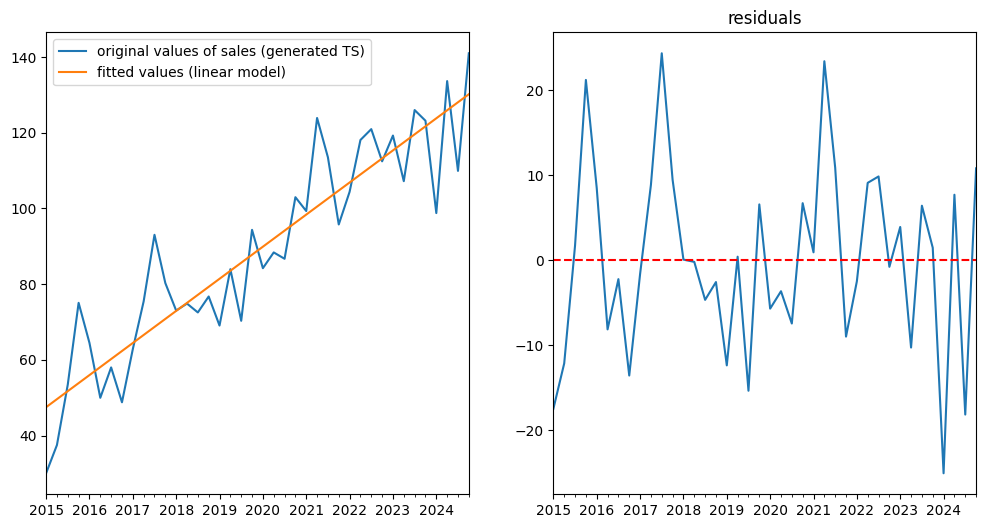

In [7]:
df['fitted'] = model.fittedvalues
df['residuals'] = model.resid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df['sales'].plot(ax=ax1, label = "original values of sales (generated TS)")
df["fitted"].plot(ax=ax1, label="fitted values (linear model)")
ax1.legend()

df['residuals'].plot(ax=ax2, title='residuals')
ax2.axhline(y=0, color='r', linestyle='--')
plt.show()

In [8]:
t_forecast = np.arange(41, 49)
x_forecast = sm.add_constant(t_forecast)
forecast = model.predict(x_forecast)
forecast_index = pd.period_range(start="2016Q1", periods=8, freq="Q")
df_forecast = pd.DataFrame({'forecast': forecast}, index=forecast_index)
print(df_forecast)

          forecast
2016Q1  132.292382
2016Q2  134.412484
2016Q3  136.532586
2016Q4  138.652688
2017Q1  140.772790
2017Q2  142.892891
2017Q3  145.012993
2017Q4  147.133095
